In [1]:
# Coding a Neural Network from scratch
# (Ref: https://www.youtube.com/watch?v=w8yWXqWQYmU)

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [3]:
data = pd.read_csv("/home/db/Documents/Other-stuff/Datasets/MNIST/digit-recognizer/train.csv")

In [6]:
data.head()
# Each image is of dimension 28x28 = 784, and there are m=42000 such training examples

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data.shape

(42000, 785)

In [10]:
data = np.array(data) # converted it to np array for linalg convenience
m, n = data.shape
np.random.shuffle(data)

In [95]:
validation_data = data[0:1000].T
Y_validation = validation_data[0]
x_validation = validation_data[1:]
x_validation = x_validation / 255 # normalizing values in grayscale (0-255)
print(Y_validation.shape, x_validation.shape)

training_data = data[1000:].T
Y_train = training_data[0]
x_train = training_data[1:]
x_train = x_train / 255 # normalizing values in grayscale (0-255)
print(Y_train.shape, x_train.shape)

(1000,) (784, 1000)
(41000,) (784, 41000)


In [109]:
# Initializing the parameters
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [110]:
def ReLU(Z):
    return np.maximum(0, Z) # element-wise maximum of the vector

def softmax(Z):
    return (np.exp(Z) / sum(np.exp(Z))) # again, using numpy for element-wise application in vector

# Forward propagation
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2) # A2 is our y^hat, the predicted output
    return Z1, A1, Z2, A2

In [111]:
def one_hot_encode(Y):
    ohY = np.zeros((Y.size, 10))
    ohY[np.arange(Y.size), Y] = 1 # for i = 1 to m, ohY[i, Y[i]] = 1
    ohY = ohY.T
    return ohY

def derivative_ReLU(Z):
    # if Z > 0 d_ReLU = 1, else it is 0
    return Z > 0

# Backward propagation
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size
    ohY = one_hot_encode(Y)
    dZ2 = A2 - ohY
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1).reshape(-1, 1)
    dZ1 = W2.T.dot(dZ2) * derivative_ReLU(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1, axis=1).reshape(-1, 1)
    return dW1, db1, dW2, db2

In [112]:
# updating the parameters
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    return W1, b1, W2, b2

In [113]:
def get_accuracy(A2, Y):
    predictions = np.argmax(A2, axis=0) # maximum value in A2 in each column is the predicted value
#     print(predictions, Y)
    accuracy = np.sum(predictions == Y) / Y.size
    return accuracy

# gradient descent for training
def gradient_descent(X, Y, num_iterations, learning_rate):
    W1, b1, W2, b2 = init_params()
    
    for i in range(num_iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
        
        if i % 10 == 0:
            print("Iteration =", i, "Accuracy = ", get_accuracy(A2, Y))
    
    return W1, b1, W2, b2

In [114]:
W1, b1, W2, b2 = gradient_descent(x_train, Y_train, 500, 0.2)

Iteration = 0 Accuracy =  0.09685365853658537
Iteration = 10 Accuracy =  0.29178048780487803
Iteration = 20 Accuracy =  0.4541219512195122
Iteration = 30 Accuracy =  0.5759024390243902
Iteration = 40 Accuracy =  0.6473658536585366
Iteration = 50 Accuracy =  0.6900731707317073
Iteration = 60 Accuracy =  0.7205609756097561
Iteration = 70 Accuracy =  0.7429512195121951
Iteration = 80 Accuracy =  0.7606829268292683
Iteration = 90 Accuracy =  0.7741951219512195
Iteration = 100 Accuracy =  0.7854878048780488
Iteration = 110 Accuracy =  0.795609756097561
Iteration = 120 Accuracy =  0.8046341463414635
Iteration = 130 Accuracy =  0.8121219512195123
Iteration = 140 Accuracy =  0.818170731707317
Iteration = 150 Accuracy =  0.8237560975609756
Iteration = 160 Accuracy =  0.8286585365853658
Iteration = 170 Accuracy =  0.833170731707317
Iteration = 180 Accuracy =  0.8369756097560975
Iteration = 190 Accuracy =  0.8395365853658536
Iteration = 200 Accuracy =  0.836780487804878
Iteration = 210 Accuracy =

~88% training accuracy

In [126]:
# testing
test_data = pd.read_csv("/home/db/Documents/Other-stuff/Datasets/MNIST/digit-recognizer/test.csv")
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
print(test_data.shape)

(28000, 784)


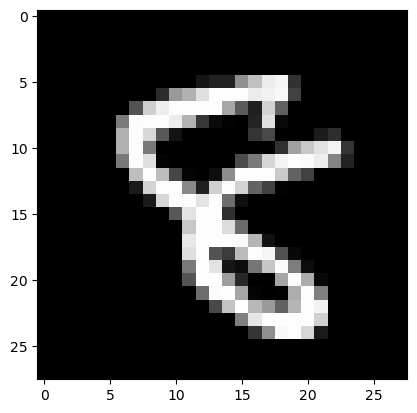

In [158]:
test_data = np.array(test_data)
np.random.shuffle(test_data)
# firstly print the image, then see what output is being predicted
def print_image(idx):
    plt.imshow(test_data[idx].reshape((28, 28)), cmap="gray")
print_image(7)

In [159]:
def predict_output(idx):
    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, test_data[idx])
    print_image(idx)
    print("predicted label =", np.argmax(A2))

predicted label = 0


/tmp/ipykernel_8826/3446955684.py:5: RuntimeWarning: overflow encountered in exp
  return (np.exp(Z) / sum(np.exp(Z))) # again, using numpy for element-wise application in vector
/tmp/ipykernel_8826/3446955684.py:5: RuntimeWarning: invalid value encountered in divide
  return (np.exp(Z) / sum(np.exp(Z))) # again, using numpy for element-wise application in vector


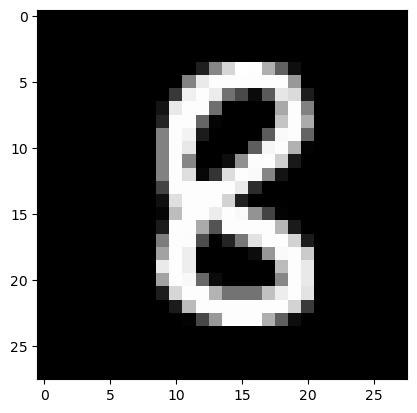

In [160]:
predict_output(8)

predicted label = 3


/tmp/ipykernel_8826/3446955684.py:5: RuntimeWarning: overflow encountered in exp
  return (np.exp(Z) / sum(np.exp(Z))) # again, using numpy for element-wise application in vector
/tmp/ipykernel_8826/3446955684.py:5: RuntimeWarning: invalid value encountered in divide
  return (np.exp(Z) / sum(np.exp(Z))) # again, using numpy for element-wise application in vector


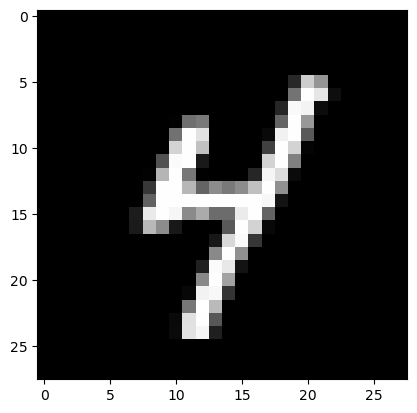

In [161]:
predict_output(15)

predicted label = 2


/tmp/ipykernel_8826/3446955684.py:5: RuntimeWarning: overflow encountered in exp
  return (np.exp(Z) / sum(np.exp(Z))) # again, using numpy for element-wise application in vector
/tmp/ipykernel_8826/3446955684.py:5: RuntimeWarning: invalid value encountered in divide
  return (np.exp(Z) / sum(np.exp(Z))) # again, using numpy for element-wise application in vector


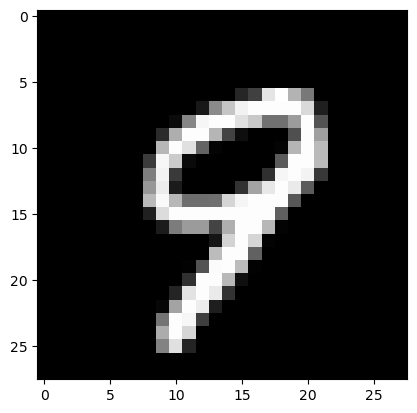

In [162]:
predict_output(0)

predicted label = 1


/tmp/ipykernel_8826/3446955684.py:5: RuntimeWarning: overflow encountered in exp
  return (np.exp(Z) / sum(np.exp(Z))) # again, using numpy for element-wise application in vector
/tmp/ipykernel_8826/3446955684.py:5: RuntimeWarning: invalid value encountered in divide
  return (np.exp(Z) / sum(np.exp(Z))) # again, using numpy for element-wise application in vector


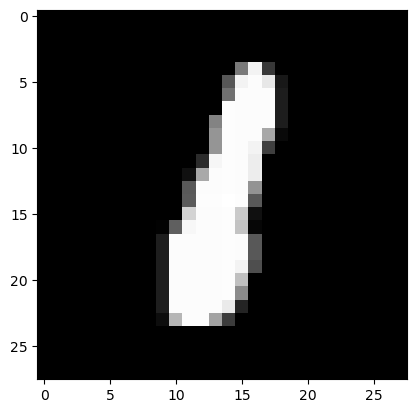

In [163]:
predict_output(3)

predicted label = 0


/tmp/ipykernel_8826/3446955684.py:5: RuntimeWarning: overflow encountered in exp
  return (np.exp(Z) / sum(np.exp(Z))) # again, using numpy for element-wise application in vector
/tmp/ipykernel_8826/3446955684.py:5: RuntimeWarning: invalid value encountered in divide
  return (np.exp(Z) / sum(np.exp(Z))) # again, using numpy for element-wise application in vector


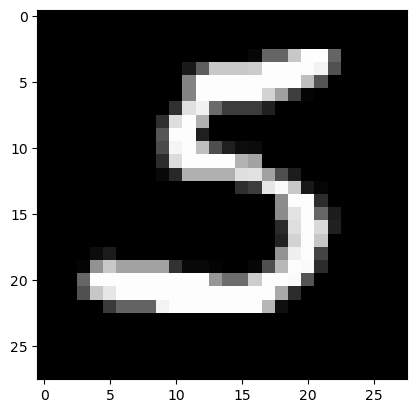

In [164]:
predict_output(5)

predicted label = 0


/tmp/ipykernel_8826/3446955684.py:5: RuntimeWarning: overflow encountered in exp
  return (np.exp(Z) / sum(np.exp(Z))) # again, using numpy for element-wise application in vector
/tmp/ipykernel_8826/3446955684.py:5: RuntimeWarning: invalid value encountered in divide
  return (np.exp(Z) / sum(np.exp(Z))) # again, using numpy for element-wise application in vector


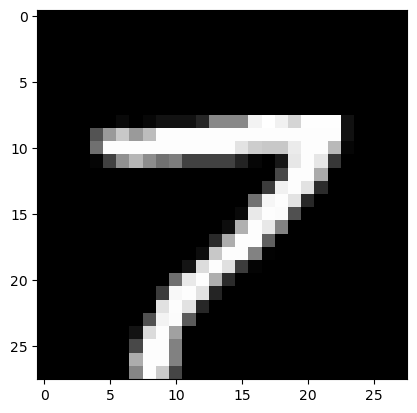

In [165]:
predict_output(1283)

predicted label = 1


/tmp/ipykernel_8826/3446955684.py:5: RuntimeWarning: overflow encountered in exp
  return (np.exp(Z) / sum(np.exp(Z))) # again, using numpy for element-wise application in vector
/tmp/ipykernel_8826/3446955684.py:5: RuntimeWarning: invalid value encountered in divide
  return (np.exp(Z) / sum(np.exp(Z))) # again, using numpy for element-wise application in vector


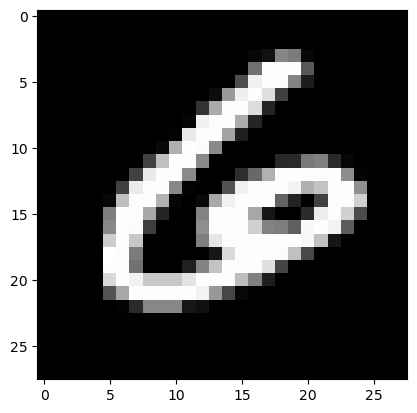

In [166]:
predict_output(4123)

predicted label = 0


/tmp/ipykernel_8826/3446955684.py:5: RuntimeWarning: overflow encountered in exp
  return (np.exp(Z) / sum(np.exp(Z))) # again, using numpy for element-wise application in vector
/tmp/ipykernel_8826/3446955684.py:5: RuntimeWarning: invalid value encountered in divide
  return (np.exp(Z) / sum(np.exp(Z))) # again, using numpy for element-wise application in vector


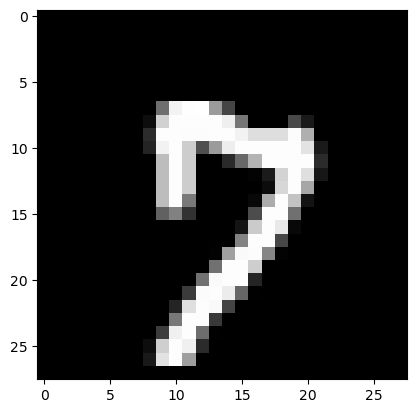

In [167]:
predict_output(12323)

predicted label = 1


/tmp/ipykernel_8826/3446955684.py:5: RuntimeWarning: overflow encountered in exp
  return (np.exp(Z) / sum(np.exp(Z))) # again, using numpy for element-wise application in vector
/tmp/ipykernel_8826/3446955684.py:5: RuntimeWarning: invalid value encountered in divide
  return (np.exp(Z) / sum(np.exp(Z))) # again, using numpy for element-wise application in vector


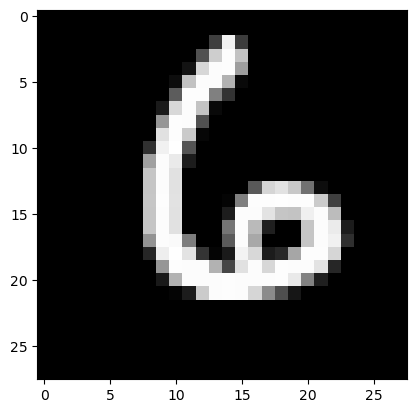

In [168]:
predict_output(123)

predicted label = 1


/tmp/ipykernel_8826/3446955684.py:5: RuntimeWarning: overflow encountered in exp
  return (np.exp(Z) / sum(np.exp(Z))) # again, using numpy for element-wise application in vector
/tmp/ipykernel_8826/3446955684.py:5: RuntimeWarning: invalid value encountered in divide
  return (np.exp(Z) / sum(np.exp(Z))) # again, using numpy for element-wise application in vector


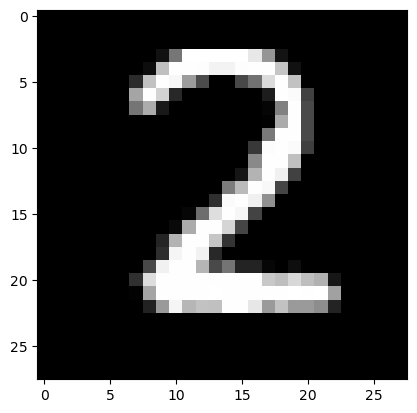

In [169]:
predict_output(4234)

predicted label = 1


/tmp/ipykernel_8826/3446955684.py:5: RuntimeWarning: overflow encountered in exp
  return (np.exp(Z) / sum(np.exp(Z))) # again, using numpy for element-wise application in vector
/tmp/ipykernel_8826/3446955684.py:5: RuntimeWarning: invalid value encountered in divide
  return (np.exp(Z) / sum(np.exp(Z))) # again, using numpy for element-wise application in vector


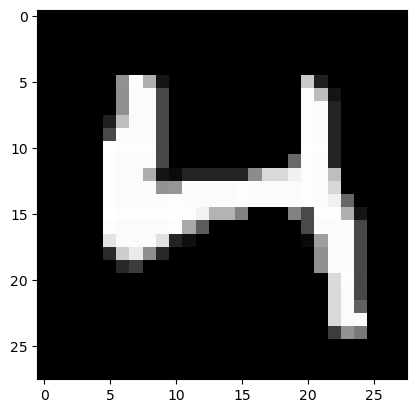

In [170]:
predict_output(109)

predicted label = 0


/tmp/ipykernel_8826/3446955684.py:5: RuntimeWarning: overflow encountered in exp
  return (np.exp(Z) / sum(np.exp(Z))) # again, using numpy for element-wise application in vector
/tmp/ipykernel_8826/3446955684.py:5: RuntimeWarning: invalid value encountered in divide
  return (np.exp(Z) / sum(np.exp(Z))) # again, using numpy for element-wise application in vector


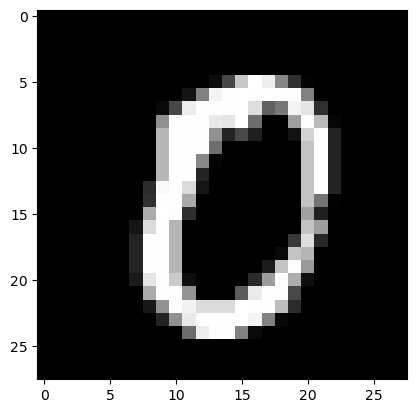

In [212]:
random_idx = random.randint(0, test_data[0].size-1)
predict_output(random_idx)

Though I did not calculate test data accuracy, it is not very accurate from the small sample that I tested.
It gives mostly correct predictions for 0 and 1, but messes up others.
Regardless, it is a pretty barebones model with a lot of room for improvement.